In [1]:
#references : https://www.youtube.com/watch?v=kMJDsh0TCik&ab_channel=ManusiaSetengahChiKuadrat

In [2]:
import pandas as pd
import numpy as np
import re
import string

# Read Data

In [3]:
review_nlp = pd.read_csv('./review tokped mentah.csv')
review_nlp.head()

,content,score
0,keren,5
1,sukses untuk GOTO,5
2,Kenapa tidak bisa top up,1
3,"Saya beli hp di sini baru ini begini, reseller...",1
4,good job,5


In [4]:
review_nlp['score'].value_counts()

5    122
1     45
4     13
2     10
3     10
Name: score, dtype: int64

# Labeling

In [5]:
label = []

for index, row in review_nlp.iterrows():
    if row['score'] >=4 : 
        label.append(1) #label 1 untuk rating 4 keatas
    else : 
        label.append(0) #label 0 untuk rating 3 sampai 1
        
review_nlp['label'] = label
review_nlp = review_nlp.drop(columns=['score'])

review_nlp.head()

,content,label
0,keren,1
1,sukses untuk GOTO,1
2,Kenapa tidak bisa top up,0
3,"Saya beli hp di sini baru ini begini, reseller...",0
4,good job,1


In [6]:
review_nlp['label'].value_counts()

1    135
0     65
Name: label, dtype: int64

# mengatasi data tidak imbang

In [7]:
#oversampling
s1 = review_nlp[review_nlp['label']==1].sample(130, replace=True)
s2 = review_nlp[review_nlp['label']==0].sample(130, replace=True)
review_nlp = pd.concat([s1,s2])
print(review_nlp.shape)
print(review_nlp['label'].value_counts(normalize=True))

(260, 2)
1    0.5
0    0.5
Name: label, dtype: float64


# visualisasi text

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

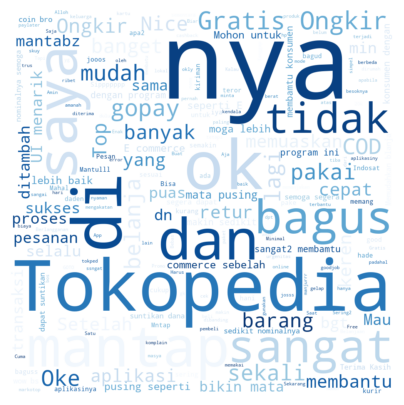

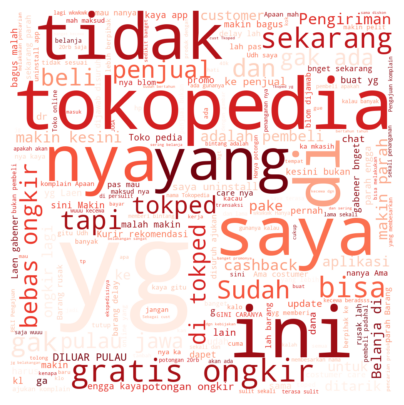

In [9]:
content_1 = review_nlp[review_nlp['label']==1]
content_1 = ' '.join(word for word in content_1['content'])
wcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode= 'RGBA', background_color='white').generate(content_1)
plt.figure(figsize=(5, 5))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

content_0 = review_nlp[review_nlp['label']==0]
content_0 = ' '.join(word for word in content_0['content'])
wcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode= 'RGBA', background_color='white').generate(content_0)
plt.figure(figsize=(5, 5))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

# Text Cleansing

In [10]:
def remove_unused(text):
    text = re.sub('[0-9]+', '', text)
    text = re.sub(r'\$\w*', '', text)
    text = re.sub(r'@[\w]*', '', text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = text.replace('\n', ' ')
    text = text.encode('ascii', 'ignore').decode('utf-8')
    text = re.sub(r'[^\x00-\x7f]', r'', text)
    text = re.sub(r'[^\w]', ' ', text)
    space = ['    ', '   ', '  ']
    for i in space:
        text = text.replace(i, ' ')
    text = text.lower().strip()
#     text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [11]:
review_nlp['clean text'] = review_nlp['content'].apply(lambda x: remove_unused(x))
review_nlp = review_nlp[['clean text', 'label']]

In [12]:
review_nlp

,clean text,label
17,mantap,1
5,banyak gratis ongkir ui menarik dan tidak biki...,1
79,promo yang memanjakan pembeli sukses trus prod...,1
129,sering error,1
26,aplikasi cepat sekali,1
...,...,...
137,thx tokped,0
11,makin kesini makin gak asik,0
48,gratis ongkir nya kurang banyak,0
69,tolong dikembalikan subsidi ongkir yg dulu rb ...,0


In [13]:
#import stemmer
import nltk
from nltk.stem.snowball import SnowballStemmer
#the stemmer requires a language parameter
stemmer = SnowballStemmer(language='english')
#import stemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer_id = StemmerFactory().create_stemmer()

In [14]:
#import stopword
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
stopworder = set(stopwords.words('indonesian', 'english'))
stopword = StopWordRemoverFactory().create_stop_word_remover()
from nltk.tokenize import word_tokenize
tokenizer = word_tokenize

In [15]:
def cleansing(data):
    text = stemmer_id.stem(data)
    text = stopword.remove(text)
    text = tokenizer(text)
    text = [stemmer.stem(t) for t in text] #.split()]#stemmer inggris
    text = [word for word in text if word not in stopworder]
    text = ' '.join(word for word in text)
    return text

In [16]:
#contoh
tes ='jika novel berteriak minta keadilan bagaimana'
cleaned = cleansing(tes)
print(cleaned)

novel teriak adil


In [17]:
data_clean = review_nlp['clean text'].apply(cleansing)

In [18]:
data_clean

17                                                mantap
5         grati ongkir ui tarik bikin puse commerc belah
79          promo manja beli suks trus produk lokal amin
129                                                error
26                                        aplikasi cepat
                             ...                        
137                                             thx tokp
11                                       kesini gak asik
48                                          grati ongkir
69      tolong subsidi ongkir yg rb rb jarang lanja tokp
161    duit jual gak tarik woy udah dr kemaren uang m...
Name: clean text, Length: 260, dtype: object

In [19]:
review_nlp['text'] = data_clean
data_nlp = review_nlp[['text', 'label']]

In [20]:
data_nlp.head()

,text,label
17,mantap,1
5,grati ongkir ui tarik bikin puse commerc belah,1
79,promo manja beli suks trus produk lokal amin,1
129,error,1
26,aplikasi cepat,1


# Feature Enginering Bag Of Word

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
vectorizer_bow= CountVectorizer()

In [23]:
chat = ['halo apa kabar', 
        'selamat bulan puasa',
        'lagi dimana',
        'how dinner eat'
       ]
chet = ['haha apa kabar', 
        'selam bulan puasa',
        'lagi mana',
        'horse eat'
       ]

In [24]:
vectorized_bow = vectorizer_bow.fit_transform(chat)

In [25]:
vectorized_bow.shape

(4, 11)

In [26]:
#contoh feature
print(vectorized_bow.todense())

[[1 0 0 0 0 1 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 1]
 [0 0 1 0 0 0 0 0 1 0 0]
 [0 0 0 1 1 0 1 0 0 0 0]]


In [27]:
vectorizer_bow.get_feature_names()

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['apa',
 'bulan',
 'dimana',
 'dinner',
 'eat',
 'halo',
 'how',
 'kabar',
 'lagi',
 'puasa',
 'selamat']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(review_nlp['text'], review_nlp['label'], test_size=0.1,
                                                  stratify = review_nlp['label'], random_state=30)

In [29]:
X_train = vectorizer_bow.fit_transform(X_train) 
X_test = vectorizer_bow.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(234, 496)
(26, 496)


# Model Naive Bayes

In [30]:
from sklearn.naive_bayes import MultinomialNB
mnb =  MultinomialNB()

In [31]:
X_traind = X_train.toarray()
X_testd = X_test.toarray()

print(X_traind.shape)
print(X_testd.shape)

(234, 496)
(26, 496)


In [32]:
mnb.fit(X_traind, y_train)
pred = mnb.predict(X_testd)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
accuracy = accuracy_score(y_test, pred)
print(f'accuracy : {accuracy}')

accuracy : 0.8461538461538461


In [35]:
clf_r = classification_report(y_test, pred)
print(clf_r)

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       0.76      1.00      0.87        13

    accuracy                           0.85        26
   macro avg       0.88      0.85      0.84        26
weighted avg       0.88      0.85      0.84        26



C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


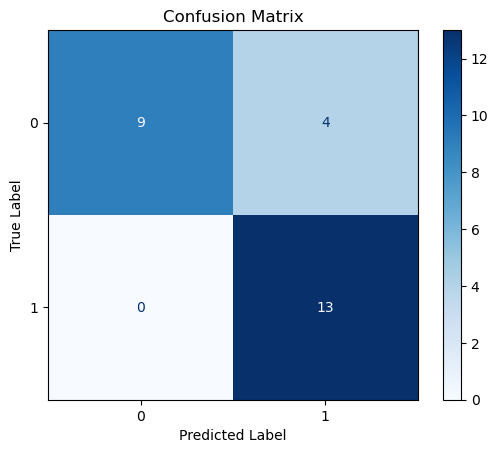

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'black'
matrix = plot_confusion_matrix(mnb, X_testd, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [38]:
import pickle

In [40]:
pickle.dump(mnb,open('model_multinonb_bow.pkl', 'wb'))

# Prediksi

In [41]:
label = {1 : 'good', 0 : 'bad'}
print(label)

{1: 'good', 0: 'bad'}


In [42]:
text_good = 'sangat bagus, aplikasi mudah membantu, suka berguna'
text_bad = 'susah jelek, tidak berguna, buruk kecewa, sulit dipakai lambat banyak iklan'

# Cleansing

In [43]:
text_clean = remove_unused(text_bad)
print(text_clean)
text_clean = cleansing(text_clean)
print(text_clean)

susah jelek tidak berguna buruk kecewa sulit dipakai lambat banyak iklan
susah jelek buruk kecewa sulit pakai lambat iklan


# to numeric

In [44]:
pred_text = vectorizer_bow.transform([text_clean])
print(pred_text.shape)
print(pred_text.todense())

(1, 496)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [45]:
prediksi = mnb.predict(pred_text.toarray())
i = np.max(prediksi)
lab = label[i]
hasil = (f'merupakan text : {lab}')
print(hasil)

merupakan text : bad
